In [2]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)


# Import the csv file
data = pd.read_csv('VDL_Norfolk_Island_Penal_Colony_Cleaned.csv')

# drop the tiral_id column
data = data.drop(columns=['trial_id'])
# drop the pp_sentence_years column
data = data.drop(columns=['pp_sentence_years'])
# 19 columns left

# Hamming distance for categories and Euclidean for numerics.

In [3]:
categories_cols = [
    'offence_pp_general',
    'offence_pp',
    'trial_place',
    'def_religion_pp',
    'marital_status_pp',
    'occupation_pp',
]
numerical_cols = [
    'trial_month',
    'trial_year',
    'pris_ht_pp',
    'def_age_pp',
    'def_literacy',
    'children_nr',
    'cash_sav_pp',
    'length_of_stay_until_probat',
    'length_of_stay_until_tl',
    'coloffence_info',
    'offence_ni',
    'death_in_custody_pp',
    'previous_convictions',
]

# Check all categories columns contain strings only
for col in categories_cols:
    if not pd.api.types.is_string_dtype(data[col]):
        print(f"Column {col} is not a string column")

# Check all numerical columns contain numbers only
for col in numerical_cols:
    if not pd.api.types.is_numeric_dtype(data[col]):
        print(f"Column {col} is not a numeric column")

# Convert all numerical columns to float
for col in numerical_cols:
    data[col] = data[col].astype(float)

# Convert all categories columns to string
for col in categories_cols:
    data[col] = data[col].astype(str)

# !!!! Normalize numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Convert to numpy array
data_matrix = data.to_numpy()

# Identify categorical and numerical columns
cat_indices = [data.columns.get_loc(col) for col in categories_cols]
num_indices = [data.columns.get_loc(col) for col in numerical_cols]

# # Fit the K-Prototypes model
# kproto = KPrototypes(n_clusters=5, init='Cao', n_init=10, verbose=2) # try 10 different initializations
# clusters = kproto.fit_predict(data_matrix, categorical=cat_indices)

display(data.head())

,offence_pp_general,offence_pp,trial_month,trial_year,trial_place,pris_ht_pp,def_age_pp,def_literacy,def_religion_pp,marital_status_pp,children_nr,cash_sav_pp,occupation_pp,coloffence_info,offence_ni,death_in_custody_pp,length_of_stay_until_probat,length_of_stay_until_tl,previous_convictions
0,SEXUAL,RAPE,-0.968576,0.538885,UNKNOWN,0.013711,-0.058965,0.001339,Protestant,S,-0.157935,-0.041449,FARM LABOURER,-0.573864,-0.895657,-0.434204,-0.014872,1.148891,-0.891463
1,SEXUAL,RAPE,-1.266325,0.538885,UNKNOWN,0.013711,2.199294,0.001339,Protestant,S,-0.157935,-0.041449,BOATMAN,-0.573864,1.116498,-0.434204,-0.014872,0.829841,-0.891463
2,STEALING,BURGLARY,0.520166,0.350013,UNKNOWN,0.415463,0.654170,0.909551,Protestant,S,-0.157935,-0.041449,UNKNOWN,-0.573864,-0.895657,-0.434204,-0.663255,-0.079271,-0.891463
3,STEALING,BURGLARY,-0.968576,0.538885,STAFFORD,0.817216,2.793573,0.001339,Protestant,M,10.760255,-0.041449,SHOEMAKER,-0.573864,-0.895657,-0.434204,-0.663255,-2.420483,-0.891463
4,ASSAULT,CUTTING,-0.968576,0.538885,UNKNOWN,0.415463,-0.296676,-0.906873,Protestant,S,-0.157935,-0.041449,FARM LABOURER,-0.573864,-0.895657,-0.434204,-0.663255,-0.079271,-0.891463


Running KPrototypes with k=5
Running KPrototypes with k=6
Running KPrototypes with k=7
Running KPrototypes with k=8
Running KPrototypes with k=9
Running KPrototypes with k=10
Running KPrototypes with k=11
Running KPrototypes with k=12
Running KPrototypes with k=13
Running KPrototypes with k=14
Running KPrototypes with k=15
Running KPrototypes with k=16
Running KPrototypes with k=17
Running KPrototypes with k=18
Running KPrototypes with k=19
Running KPrototypes with k=20


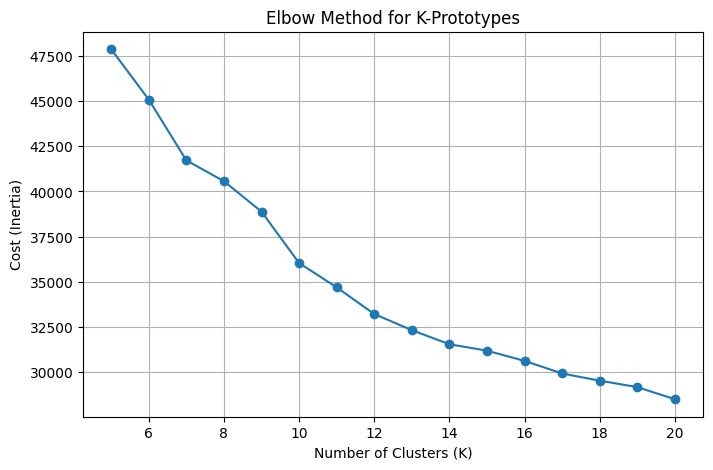

In [4]:
# Try different values of K and record cost
costs = []
K_range = range(5, 21)

for k in K_range:
    print(f"Running KPrototypes with k={k}")
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    kproto.fit_predict(data_matrix, categorical=cat_indices)
    costs.append(kproto.cost_)

# Plot elbow graph
plt.figure(figsize=(8, 5))
plt.plot(list(K_range), costs, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method for K-Prototypes')
plt.grid(True)
plt.show()

In [5]:
# ==========================

# Fit the K-Prototypes model with the optimal number of clusters

n_clusters = 12

kproto = KPrototypes(n_clusters=12, init='Cao', n_init=10, verbose=1, random_state=42)
clusters = kproto.fit_predict(data_matrix, categorical=cat_indices)
data['cluster'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1682, ncost: 36123.24097684467
Run: 1, iteration: 2/100, moves: 641, ncost: 34225.19497324002
Run: 1, iteration: 3/100, moves: 299, ncost: 33938.82668540492
Run: 1, iteration: 4/100, moves: 192, ncost: 33840.401694816086
Run: 1, iteration: 5/100, moves: 170, ncost: 33781.625523921706
Run: 1, iteration: 6/100, moves: 117, ncost: 33751.75956477131
Run: 1, iteration: 7/100, moves: 54, ncost: 33739.47170996484
Run: 1, iteration: 8/100, moves: 49, ncost: 33726.24326330374
Run: 1, iteration: 9/100, moves: 46, ncost: 33715.86879538568
Run: 1, iteration: 10/100, moves: 35, ncost: 33707.68721314867
Run: 1, iteration: 11/100, moves: 46, ncost: 33693.938497147115
Run: 1, iteration: 12/100, moves: 46, ncost: 33684.1939383626
Run: 1, iteration: 13/100, moves: 39, ncost: 33677.85137740895
Run: 1, iteration: 14/100

In [21]:
# Get all numerical centroids
numerical_centroids = kproto.cluster_centroids_[:, :len(num_indices)].astype(float)
# # Get all categorical centroids
categorical_centroids = kproto.cluster_centroids_[:, len(num_indices):].astype(str)

# Split the original data into numerical and categorical
numeric_data = data[numerical_cols].to_numpy(dtype=float)
print(len(numeric_data))
categorical_data = data[categories_cols].to_numpy(dtype=object)
print(len(categorical_data))

gamma = 1.0
distances = np.zeros(numeric_data.shape[0])

# Compute the numerical distances and categorical distances from each data point to its centroids
for i in range(data.shape[0]):
    # Get the cluster index for the current data point
    cluster_index = data['cluster'][i]
    # Get the numerical centroid for the current cluster
    numerical_centroid = numerical_centroids[cluster_index]
    # Get the categorical centroid for the current cluster
    categorical_centroid = categorical_centroids[cluster_index]

    # Get the numerical data for the current data point
    numerical_data_point = numeric_data[i]
    # Get the categorical data for the current data point
    categorical_data_point = categorical_data[i]

    assert len(numerical_data_point) == len(numerical_centroid)
    assert len(categorical_data_point) == len(categorical_centroid)

    # Compute the numerical distance (L2 norm)
    try:
        numerical_distance = np.linalg.norm(numerical_data_point - numerical_centroid)
    except Exception as e:
        print(f"Error computing numerical distance for index {i}: {e}")
        print(f"Numerical data point: {numerical_data_point}")
        print(f"Numerical centroid: {numerical_centroid}")
        raise
    numerical_distance = np.linalg.norm(numerical_data_point - numerical_centroid)
    # Compute the categorical distance (Hamming distance)
    categorical_distance = np.sum(categorical_data_point != categorical_centroid)
    # Compute the total distance
    distances[i] = numerical_distance + gamma * categorical_distance

data['distance'] = distances

# Flag the outliers
threshold = np.percentile(data['distance'], 95)
data['is_outlier'] = data['distance'] > threshold

# Count the number of outliers
outlier_count = data['is_outlier'].sum()
print(f"Number of outliers: {outlier_count}")

4747
4747
Number of outliers: 238


In [22]:
# Re-import the csv file
fresh_data = pd.read_csv('VDL_Norfolk_Island_Penal_Colony_Cleaned.csv')
# Add distance and is_outlier columns to the fresh data

# Print the details of the top 10 outliers using the fresh data
# Add the distance and is_outlier columns to the fresh data
fresh_data['distance'] = data['distance']
fresh_data['is_outlier'] = data['is_outlier']
outliers = fresh_data[fresh_data['is_outlier'] == True]
outliers = outliers.sort_values(by='distance', ascending=False)
outliers.head(10)


,trial_id,offence_pp_general,offence_pp,pp_sentence_years,trial_month,trial_year,trial_place,pris_ht_pp,def_age_pp,def_literacy,def_religion_pp,marital_status_pp,children_nr,cash_sav_pp,occupation_pp,coloffence_info,offence_ni,death_in_custody_pp,length_of_stay_until_probat,length_of_stay_until_tl,previous_convictions,distance,is_outlier
1821,698533,PROCESSING,RECEIVING_STOLEN_GOODS,99.0,10,1835,UNKNOWN,165.10,20.0,0.0,Protestant,S,2.0,48.0,FARM LABOURER,True,False,False,30.928767,7.795890,True,20.916553,True
1780,698492,ROBBERY,ROBBERY,99.0,4,1848,UNKNOWN,165.10,18.0,3.0,Protestant,S,2.0,48.0,ERRAND,True,False,False,3.649315,26.178082,True,19.227741,True
2395,699111,ASSAULT,MURDER,99.0,1,1845,UNKNOWN,165.10,32.0,2.0,UNKNOWN,M,4.0,48.0,UNKNOWN,True,False,False,3.649315,27.432877,True,19.188349,True
1807,698519,STEALING,CATTLE_STEALING,99.0,7,1845,UNKNOWN,165.10,20.0,3.0,Protestant,S,2.0,48.0,LABOURER,True,False,False,3.649315,26.276712,True,18.250121,True
2294,699009,ASSAULT,ASSAULT,99.0,12,1833,UNKNOWN,165.10,16.0,3.0,Roman Catholic,S,2.0,48.0,SAILOR,True,False,True,3.649315,24.920548,True,17.634345,True
2410,699126,UNKNOWN,UNKNOWN,99.0,1,1846,UNKNOWN,165.10,19.0,0.0,Protestant,S,2.0,48.0,LABOURER,True,False,False,24.884932,7.795890,True,17.253631,True
2217,698932,STEALING,BURGLARY,99.0,12,1845,UNKNOWN,165.10,20.0,2.0,UNKNOWN,UNKNOWN,2.0,48.0,LABOURER,True,False,False,3.649315,26.202740,True,17.250712,True
1925,698638,ASSAULT,MURDER,99.0,1,1846,UNKNOWN,165.10,20.0,2.0,UNKNOWN,UNKNOWN,2.0,48.0,LABOURER,True,False,False,3.649315,22.323288,True,17.175216,True
1725,698437,ASSAULT,UTTERING,99.0,9,1846,UNKNOWN,165.10,23.0,2.0,UNKNOWN,M,2.0,48.0,LABOURER,True,False,False,3.649315,22.123288,True,16.959336,True
62,695797,ASSAULT,WOUNDING,15.0,3,1844,STAFFORD,180.34,26.0,3.0,Roman Catholic,S,2.0,214.0,UNKNOWN,False,True,False,3.649315,7.795890,False,16.862574,True


In [23]:
# Print old number of rows
print(fresh_data.shape[0])
# Remove rows with outliers
fresh_data = fresh_data[~data['is_outlier']]
# Print new number of rows
print(fresh_data.shape[0])
# Drop the distance and is_outlier columns
fresh_data = fresh_data.drop(columns=['distance', 'is_outlier'])
# Save the cleaned data to a new csv file
fresh_data.to_csv('VDL_Norfolk_Island_Penal_Colony_Cleaned_No_Outliers.csv', index=False)

4747
4509
